# 🧮 BÀI KIỂM TRA SỐ 2 – FRESH15 + PHÂN PHỐI POISSON

In [42]:

import pandas as pd
import numpy as np
from scipy.stats import norm, poisson

# 1️⃣ Đọc file dữ liệu ----------------------------------------------------------
df = pd.read_excel("/Users/trangnguyen/Downloads/HKI_4/GK_TKMT/data/03_FRESH15.xls")
print("✅ Kích thước dữ liệu:", df.shape)
display(df.head())
print("\nThiếu dữ liệu:")
display(df.isna().sum())

✅ Kích thước dữ liệu: (67, 5)


,SEX,WTSEP,WTAPR,BMISP,BMIAP
0,M,72,59,22.02,18.14
1,M,97,86,19.70,17.44
2,M,74,69,24.09,22.43
3,M,93,88,26.97,25.57
4,F,68,64,21.51,20.10



Thiếu dữ liệu:


SEX      0
WTSEP    0
WTAPR    0
BMISP    0
BMIAP    0
dtype: int64

In [43]:
#làm sạch dữ liệu 
# Xóa các cột Unnamed
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Xóa các dòng hoàn toàn trống
df = df.dropna(how='all')

# Kiểm tra các dòng trùng lặp
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Có {duplicates} dòng trùng → sẽ xóa")
    df = df.drop_duplicates() 


# Kiểm tra giá trị thiếu
missing = df.isna().sum()
print("\n🔍 Số lượng dữ liệu bị thiếu:")
print(missing[missing > 0])


# Xử lý giá trị thiếu: ví dụ điền bằng trung bình cho cột số
for col in df.select_dtypes(include=['number']).columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)


# 3️⃣ Kiểm tra lại sau khi xử lý
print("\n✅ Sau khi làm sạch:")
print(df.info())


🔍 Số lượng dữ liệu bị thiếu:
Series([], dtype: int64)

✅ Sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEX     67 non-null     object 
 1   WTSEP   67 non-null     int64  
 2   WTAPR   67 non-null     int64  
 3   BMISP   67 non-null     float64
 4   BMIAP   67 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.7+ KB
None


giải thích

df.loc[:, ~df.columns.str.contains('^Unnamed')] → xóa tất cả cột có tên bắt đầu bằng Unnamed

dropna(how='all') → bỏ dòng trống hoàn toàn

drop_duplicates() → bỏ các dòng lặp

fillna(df[col].mean()) → điền trung bình vào các cột số bị thiếu

- Mean: giá trị trung bình (đại diện khuynh hướng trung tâm)

- Median: giá trị giữa (ít bị ảnh hưởng bởi ngoại lệ)

- Std, variance: mức độ phân tán (độ ổn định của dữ liệu)

- Range: độ rộng biến thiên

In [28]:
# CÂU 1

In [29]:
# (a) Thông tin dữ liệu
print("\nCác cột:", df.columns.tolist())
print(df.describe())



Các cột: ['SEX', 'WTSEP', 'WTAPR', 'BMISP', 'BMIAP']
           WTSEP       WTAPR      BMISP      BMIAP
count  67.000000   67.000000  67.000000  67.000000
mean   65.059701   66.238806  22.030000  22.484179
std    11.285390   11.284327   3.308901   3.602527
min    42.000000   47.000000  15.080000  16.890000
25%    56.500000   58.000000  19.965000  20.230000
50%    64.000000   66.000000  21.730000  22.310000
75%    70.500000   70.000000  23.160000  23.860000
max    97.000000  105.000000  36.570000  40.860000


In [30]:
# (b) Khoảng tin cậy 95% cho trung bình BMI tháng 9 ----------------------------
x = df["BMISP"].dropna()
n = len(x)
mean = x.mean()
std = x.std(ddof=1)
z95 = norm.ppf(0.975)
ci_low = mean - z95 * std / np.sqrt(n)
ci_high = mean + z95 * std / np.sqrt(n)
print(f"\n1.b) 95% CI cho trung bình BMI tháng 9: ({ci_low:.3f}, {ci_high:.3f})")




1.b) 95% CI cho trung bình BMI tháng 9: (21.238, 22.822)


In [31]:
# (c) Trung bình BMI tháng 9 theo giới tính ------------------------------------
means = {}
for sex in ["M", "F"]:
    group = df.loc[df["SEX"] == sex, "BMISP"].dropna()
    n = len(group)
    mean = group.mean()
    std = group.std(ddof=1)
    ci_low = mean - z95 * std / np.sqrt(n)
    ci_high = mean + z95 * std / np.sqrt(n)
    means[sex] = mean
    print(f"{sex}: mean={mean:.3f}, 95% CI=({ci_low:.3f}, {ci_high:.3f})")

# So sánh nam vs nữ ------------------------------------------------------------
if means["M"] > means["F"]:
    compare = "Nam có BMI trung bình cao hơn Nữ."
elif means["M"] < means["F"]:
    compare = "Nữ có BMI trung bình cao hơn Nam."
else:
    compare = "BMI trung bình giữa hai giới tương đương."
print(f"👉 Nhận xét: {compare}")


M: mean=22.629, 95% CI=(21.389, 23.869)
F: mean=21.482, 95% CI=(20.493, 22.472)
👉 Nhận xét: Nam có BMI trung bình cao hơn Nữ.


In [32]:
# (d) Tỷ lệ người có BMI giảm (BMI tháng 4 < tháng 9), CI 90% ------------------
cond = df["BMIAP"] < df["BMISP"]
p = cond.mean()
n = cond.count()
z90 = norm.ppf(0.95)
ci_low = p - z90 * np.sqrt(p * (1 - p) / n)
ci_high = p + z90 * np.sqrt(p * (1 - p) / n)
print(f"\n1.d) Tỷ lệ BMI giảm: {p:.3f} ({p*100:.1f}%)")
print(f"     90% CI = ({ci_low:.3f}, {ci_high:.3f})")

if p > 0.5:
    print("👉 Phần lớn sinh viên có BMI giảm sau học kỳ.")
else:
    print("👉 Đa số sinh viên không giảm BMI sau học kỳ.")



1.d) Tỷ lệ BMI giảm: 0.269 (26.9%)
     90% CI = (0.180, 0.358)
👉 Đa số sinh viên không giảm BMI sau học kỳ.


In [33]:
# (e) Nhóm nữ: tỷ lệ tăng cân (WTAPR > WTSEP), CI 99% --------------------------
female = df[df["SEX"] == "F"]
cond = female["WTAPR"] > female["WTSEP"]
p_female = cond.mean()
n_female = cond.count()
z99 = norm.ppf(0.995)
ci_low = p_female - z99 * np.sqrt(p_female * (1 - p_female) / n_female)
ci_high = p_female + z99 * np.sqrt(p_female * (1 - p_female) / n_female)
print(f"\n1.e) Nữ tăng cân: {p_female:.3f} ({p_female*100:.1f}%)")
print(f"     99% CI = ({ci_low:.3f}, {ci_high:.3f})")

if p_female > 0.5:
    print("👉 Phần lớn nữ tăng cân giữa 2 thời điểm.")
else:
    print("👉 Ít nữ tăng cân, có xu hướng giảm cân nhiều hơn.")



1.e) Nữ tăng cân: 0.657 (65.7%)
     99% CI = (0.450, 0.864)
👉 Phần lớn nữ tăng cân giữa 2 thời điểm.


In [34]:
# CÂU 2 – PHÂN PHỐI POISSON (ATM)

In [35]:
lam = 10  # trung bình 10 khách / giờ

# (a) P(X=12)
p12 = poisson.pmf(12, lam)
print(f"\n2.a) P(X=12) = {p12:.4f}")

# (b) P(X<10)
p_less_10 = poisson.cdf(9, lam)
print(f"2.b) P(X<10) = {p_less_10:.4f}")

# (c) Tìm k sao cho P(X<k) ≥ 0.95
k = poisson.ppf(0.95, lam)
print(f"2.c) k sao cho P(X<k)>=0.95 là: k = {int(k)}")



2.a) P(X=12) = 0.0948
2.b) P(X<10) = 0.4579
2.c) k sao cho P(X<k)>=0.95 là: k = 15


In [36]:
print("\n🧩 PHÂN TÍCH & NHẬN XÉT:")
print(f"- Trung bình BMI Nam = {means['M']:.2f}, Nữ = {means['F']:.2f} → {compare}")
print(f"- Tỷ lệ BMI giảm = {p*100:.1f}% (90% CI: {ci_low*100:.1f}–{ci_high*100:.1f}%)")
print(f"- Tỷ lệ nữ tăng cân = {p_female*100:.1f}% (99% CI: {ci_low*100:.1f}–{ci_high*100:.1f}%)")

# So sánh logic giữa các tỷ lệ
if p > p_female:
    print("👉 Tỷ lệ giảm BMI chung cao hơn tỷ lệ nữ tăng cân.")
elif p < p_female:
    print("👉 Tỷ lệ nữ tăng cân cao hơn tỷ lệ giảm BMI chung.")
else:
    print("👉 Hai tỷ lệ này gần như bằng nhau.")

print("- Khoảng tin cậy rộng hơn nghĩa là mức độ không chắc chắn cao hơn (ví dụ CI 99%).")
print("- Với Poisson λ=10, trung bình 10 khách/h:")
print(f"    • Xác suất đúng 12 khách ≈ {p12*100:.1f}%")
print(f"    • ATM có ≤ {int(k)} khách trong 95% trường hợp.")
print("👉 Kết luận: ATM cần chuẩn bị lượng tiền mặt cho ~15 khách/h để đảm bảo 95% nhu cầu.")


🧩 PHÂN TÍCH & NHẬN XÉT:
- Trung bình BMI Nam = 22.63, Nữ = 21.48 → Nam có BMI trung bình cao hơn Nữ.
- Tỷ lệ BMI giảm = 26.9% (90% CI: 45.0–86.4%)
- Tỷ lệ nữ tăng cân = 65.7% (99% CI: 45.0–86.4%)
👉 Tỷ lệ nữ tăng cân cao hơn tỷ lệ giảm BMI chung.
- Khoảng tin cậy rộng hơn nghĩa là mức độ không chắc chắn cao hơn (ví dụ CI 99%).
- Với Poisson λ=10, trung bình 10 khách/h:
    • Xác suất đúng 12 khách ≈ 9.5%
    • ATM có ≤ 15 khách trong 95% trường hợp.
👉 Kết luận: ATM cần chuẩn bị lượng tiền mặt cho ~15 khách/h để đảm bảo 95% nhu cầu.


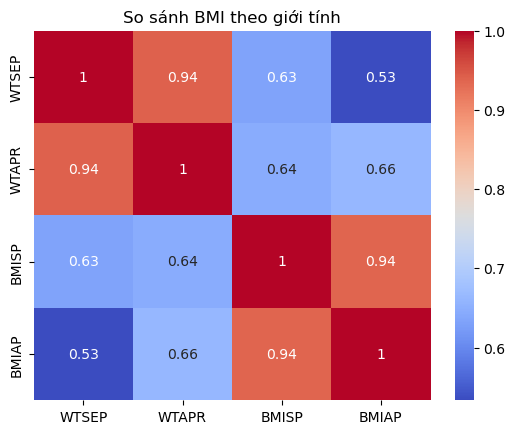

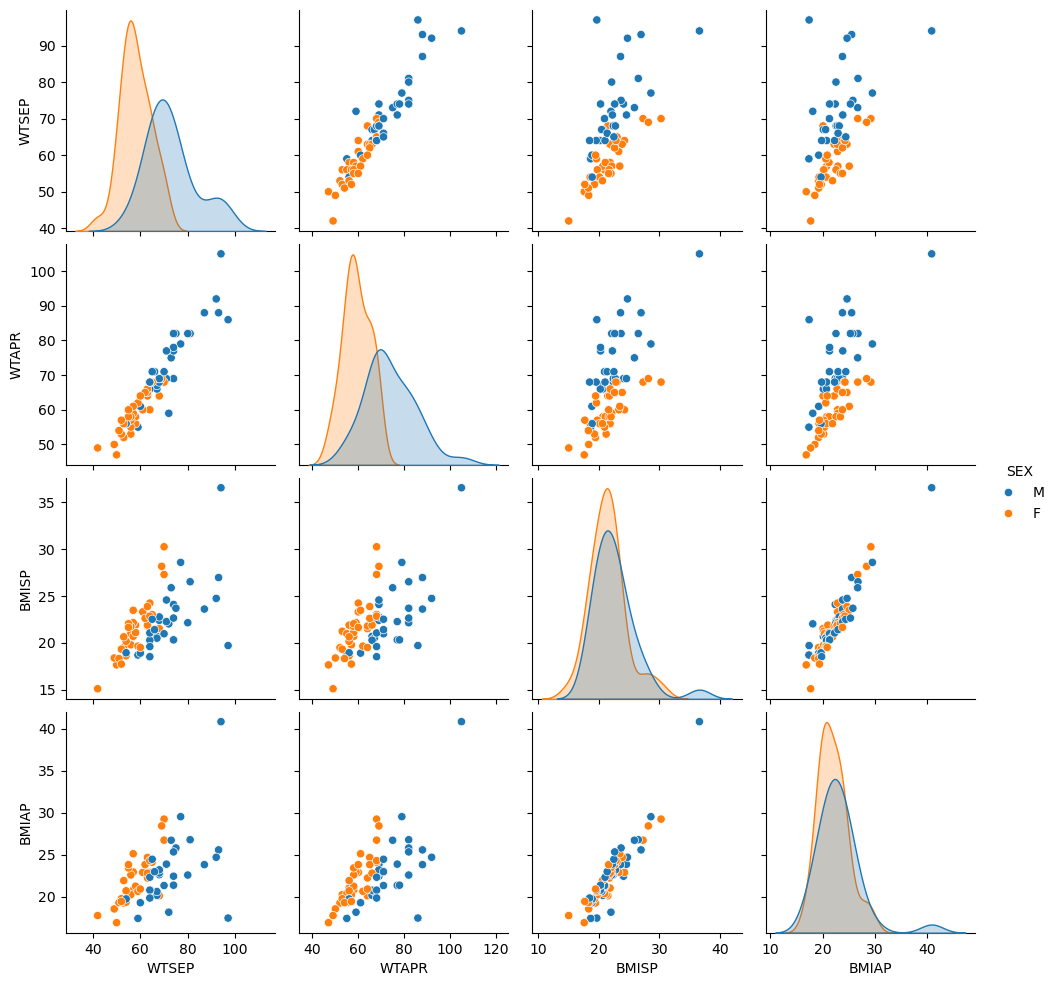

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# histogram & kde
sns.histplot(df["BMISP"], bins=15, kde=True)
plt.title("Phân phối BMI tháng 9")

# boxplot theo giới tính
sns.boxplot(data=df, x="SEX", y="BMISP")
plt.title("So sánh BMI theo giới tính")

# heatmap cho tương quan
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

# pairplot toàn tập
sns.pairplot(df, hue="SEX", diag_kind="kde")


🔹 Câu “khó” thường: “Biểu đồ nào thể hiện rõ nhất sự chênh lệch giữa hai nhóm?”
→ Boxplot (so sánh trung vị, ngoại lệ) hoặc Violinplot (hiển thị phân phối đối xứng/lệch).

In [38]:
# Tỷ lệ nam/nữ
ratio = df['SEX'].value_counts(normalize=True)
print(ratio)

# So sánh BMI trung bình giữa 2 nhóm
male_mean = df[df["SEX"]=="M"]["BMISP"].mean()
female_mean = df[df["SEX"]=="F"]["BMISP"].mean()
print(f"Nam: {male_mean:.2f}, Nữ: {female_mean:.2f}")
print("→ Nữ cao hơn" if female_mean>male_mean else "→ Nam cao hơn")

# hoặc dùng groupb
group_stats = df.groupby("SEX")[["BMISP","WTSEP","WTAPR"]].agg(["mean","std"])
display(group_stats)



SEX
F    0.522388
M    0.477612
Name: proportion, dtype: float64
Nam: 22.63, Nữ: 21.48
→ Nam cao hơn


BMISP                WTSEP                 WTAPR           
          mean       std       mean        std       mean        std
SEX                                                                 
F    21.482286  2.987467  58.057143   6.361386  59.257143   5.862858
M    22.629062  3.579468  72.718750  10.528715  73.875000  10.870944

**“Phân phối BMI có lệch phải hay lệch trái?”**
    → nhìn histogram: đuôi kéo dài bên phải ⇒ lệch phải

**“Dữ liệu có ngoại lệ không?”**
    → dùng boxplot; điểm nằm ngoài whisker là ngoại lệ

**“Biến nào tương quan mạnh nhất với trọng lượng?”**
    → đọc hệ số tương quan cao nhất trong heatmap hoặc pairplot

In [49]:
# -------------------- TIỀN XỬ LÝ --------------------
df_filled = df.copy()
df_filled = df_filled.loc[:, ~df_filled.columns.str.contains('^Unnamed')]
df_filled = df_filled.fillna(df_filled.mean(numeric_only=True))

GROUP_COL_PRIORITIES = ["region", "gender", "sex", "education", "marital_status", "loan_status", "investment"]

quant_cols = df_filled.select_dtypes(include=["number"]).columns.tolist()
qual_cols  = df_filled.select_dtypes(include=["object","category"]).columns.tolist()

print("Cột định tính:", qual_cols)
print("Cột định lượng:", quant_cols)

# -------------------- GROUPBY --------------------
group_col = None
for g in GROUP_COL_PRIORITIES:
    if g in df_filled.columns:
        group_col = g
        break

if group_col:
    gstat = df_filled.groupby(group_col)[quant_cols].agg(["mean","median","std"])
    display(gstat)

# -------------------- TỶ LỆ ĐIỀU KIỆN (> < ≥ ≤) --------------------
if quant_cols:
    base = quant_cols[0]
    thr = df_filled[base].median()
    p_gt = (df_filled[base] >  thr).mean()
    p_ge = (df_filled[base] >= thr).mean()
    p_lt = (df_filled[base] <  thr).mean()
    p_le = (df_filled[base] <= thr).mean()
    print(f"\n📐 Tỉ lệ điều kiện theo median của {base}: threshold = {thr:.3f}")
    print(f"  P({base}  >  thr) = {p_gt:.3f} | P({base} >= thr) = {p_ge:.3f}")
    print(f"  P({base}  <  thr) = {p_lt:.3f} | P({base} <= thr) = {p_le:.3f}")


Cột định tính: ['SEX']
Cột định lượng: ['WTSEP', 'WTAPR', 'BMISP', 'BMIAP']

📐 Tỉ lệ điều kiện theo median của WTSEP: threshold = 64.000
  P(WTSEP  >  thr) = 0.448 | P(WTSEP >= thr) = 0.537
  P(WTSEP  <  thr) = 0.463 | P(WTSEP <= thr) = 0.552
